# DM2022 ISA5810 Lab2 Homework Competition - Bert - with - emoji - of - each - class

## Install Packages

In [1]:
!pip install -q transformers
!pip install -q datasets

In [2]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116


In [3]:
!pip3 install seaborn

In [4]:
!pip3 install -U scikit-learn

In [29]:
!pip3 install emoji --upgrade

     |████████████████████████████████| 240 kB 1.5 MB/s            
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for emoji, since package 'wheel' is not installed.
    Running setup.py install for emoji ... done


In [48]:
!pip3 install nltk

     |████████████████████████████████| 1.5 MB 1.4 MB/s            


In [58]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/allenyl/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
!pip install spacymoji

     |████████████████████████████████| 6.4 MB 159 kB/s            
     |████████████████████████████████| 51 kB 3.4 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 181 kB 11.2 MB/s            
     |████████████████████████████████| 809 kB 11.0 MB/s            
     |████████████████████████████████| 127 kB 11.0 MB/s            
     |████████████████████████████████| 11.2 MB 61 kB/s              
     |████████████████████████████████| 46 kB 2.2 MB/s             
     |████████████████████████████████| 489 kB 10.9 MB/s            
     |████████████████████████████████| 58 kB 3.1 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 10.2 MB 12 kB/s              
     |████████████████████████████████| 116 kB 11.2 MB/s            
Using legacy 'setup.py install' for emoji, since package 'wheel' is not installed.
Using legacy 'setup.py install' for contextvars, since package 'wheel' is not 

In [42]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [27]:
!pip3 install -U imbalanced-learn

     |████████████████████████████████| 199 kB 1.5 MB/s            
     |████████████████████████████████| 199 kB 11.0 MB/s            
     |████████████████████████████████| 189 kB 11.0 MB/s            


## Checking system env

In [5]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/home/allenyl/.py_env/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
device

device(type='cuda')

In [9]:
!pwd

/home/allenyl/projects/DM2022-Lab2-Homework/Kaggle


## Loading tables

### Loading identification table

In [6]:
import pandas as pd

In [7]:
data_identification = pd.read_csv("../Kaggle/data/data_identification.csv")

In [8]:
data_identification

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


### Loading emotion table

In [9]:
emotion = pd.read_csv("../Kaggle/data/emotion.csv")

In [10]:
emotion

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


### Loading twitter table

In [11]:
import json 

twitter_data = []
with open('../Kaggle/data/tweets_DM.json') as f:
    for line in f.readlines():
        data = json.loads(line)
        twitter_data.append(data['_source']['tweet'])

In [12]:
twitter_data

[{'hashtags': ['Snapchat'],
  'tweet_id': '0x376b20',
  'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'},
 {'hashtags': ['freepress', 'TrumpLegacy', 'CNN'],
  'tweet_id': '0x2d5350',
  'text': '@brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN'},
 {'hashtags': ['bibleverse'],
  'tweet_id': '0x28b412',
  'text': 'Confident of your obedience, I write to you, knowing that you will do even more than I ask. (Philemon 1:21) 3/4 #bibleverse <LH> <LH>'},
 {'hashtags': [],
  'tweet_id': '0x1cd5b0',
  'text': 'Now ISSA is stalking Tasha 😂😂😂 <LH>'},
 {'hashtags': [],
  'tweet_id': '0x2de201',
  'text': '"Trust is not the same as faith. A friend is someone you trust. Putting faith in anyone is a mistake." ~ Christopher Hitchens <LH> <LH>'},
 {'hashtags': ['authentic', 'LaughOutLoud'],
  'tweet_id': '0x1d755c',
  'text': '@RISKshow @TheKevinAllison Thx for the BEST TIME tonight. What stories! H

In [13]:
df_twitter = pd.DataFrame(twitter_data)

In [14]:
df_twitter

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


### Join all tables

In [15]:
df_temp = df_twitter.join(data_identification.set_index('tweet_id'), on='tweet_id')
df_all = df_temp.join(emotion.set_index('tweet_id'), on='tweet_id')

In [16]:
df_all

,hashtags,tweet_id,text,identification,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,NaN
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,NaN
...,...,...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test,NaN
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,test,NaN
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...,test,NaN
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",train,joy


## Spliting dataset

### Spliting Train and Test set

In [17]:
df_train_tmp = df_all[df_all['identification'] == 'train']
df_test = df_all[df_all['identification'] == 'test']

In [61]:
df_train_tmp

,hashtags,tweet_id,text,identification,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
5,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
6,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation
...,...,...,...,...,...
1867526,"[NoWonder, Happy]",0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,train,joy
1867527,[],0x38959e,In every circumtance I'd like to be thankful t...,train,joy
1867528,[blessyou],0x2cbca6,there's currently two girls walking around the...,train,joy
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",train,joy


In [62]:
df_test

,hashtags,tweet_id,text,identification,emotion
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,NaN
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,NaN
9,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,test,NaN
30,"[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test,NaN
33,[],0x26289a,"In these tough times, who do YOU turn to as yo...",test,NaN
...,...,...,...,...,...
1867525,[],0x2913b4,"""For this is the message that ye heard from th...",test,NaN
1867529,[],0x2a980e,"""There is a lad here, which hath five barley l...",test,NaN
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test,NaN
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,test,NaN


### Spliting Train and Validation set

In [63]:
from datasets import ClassLabel
my_tags = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']
ClassLabels = ClassLabel(num_classes=len(my_tags), names=my_tags)

ClassLabels

ClassLabel(num_classes=8, names=['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy'], id=None)

#### split validation set in Stratified manner (the same class distribution as training set)

In [64]:
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.01, random_state=42)

In [66]:
for train_index, test_index in sss.split(df_train_tmp['text'], df_train_tmp['emotion']):
    print("train:", len(train_index), "test:", len(test_index))
    df_train = df_train_tmp.iloc[train_index]
    df_val = df_train_tmp.iloc[test_index]
    

train: 1441007 test: 14556


In [67]:
df_train

,hashtags,tweet_id,text,identification,emotion
794934,[],0x380be6,Today I got to know about one more fake baba ...,train,sadness
254162,[GamesOfThrones],0x28f153,GAME OF THRONES!!! 🐉 😵😮 #GamesOfThrones <LH>,train,joy
423917,[dream],0x235959,40 Never give up on your #dream. <LH> me to ma...,train,anticipation
783421,[],0x1da39e,@CNNPolitics He could just as well have been t...,train,sadness
1736577,"[gbbo, needaminiroll]",0x205458,I miss Selasi. Also why are there so many adve...,train,anticipation
...,...,...,...,...,...
288532,"[praia, cia]",0x2204f3,Beach ☀🏊😎😍 <LH> #praia <LH> #cia,train,joy
341013,[],0x1efe39,Inspire yourself before you inspire another. <...,train,joy
423159,"[TELLMEYOULOVEME, SORRYNOTSORRY, DADDYISSUES, ...",0x1f97a3,Seriously @ddlovato’s new album is pure 🔥🔥🔥 #T...,train,sadness
1146357,[],0x35036e,"When I wake up before my alarm, I don't allow ...",train,surprise


/home/allenyl/.py_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


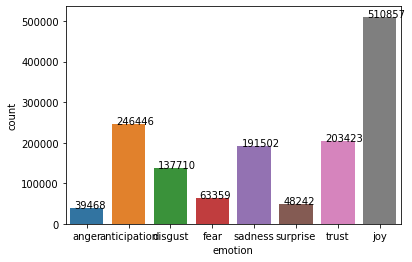

In [54]:
import seaborn as sns
ax = sns.countplot(df_train['emotion'], order=my_tags)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [69]:
df_val

,hashtags,tweet_id,text,identification,emotion
995309,[],0x1f28cc,Listening to @xtina just makes me want to pack...,train,trust
631533,[],0x2a72c1,@POWERATL @iHeartRadio @OnAirWithRyan Please m...,train,sadness
1116306,"[powerwall, Tesla, relief, humanitarian]",0x258ae8,@elonmusk #powerwall in PR with solar tiles de...,train,trust
231371,[],0x2e7bed,Closed Buy 2.1 Lots EURUSD 1.18265 for +13.4 p...,train,joy
1662848,[],0x275aae,#-#G-#Black-#amp-#Clear-#Nice-#Creative-#Desig...,train,trust
...,...,...,...,...,...
419183,[],0x275d93,@pdmcleod What is wrong with spending more on ...,train,anticipation
654425,[],0x20a02f,@HOT97 I Guess <LH> runs in that Family 🤦‍♂️🤦‍♂️,train,surprise
152330,[],0x275169,"If ur <LH> at work, u won't be working effecti...",train,disgust
137628,[],0x279cc0,"Finally feeling happiness again, in my life. ...",train,trust


/home/allenyl/.py_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


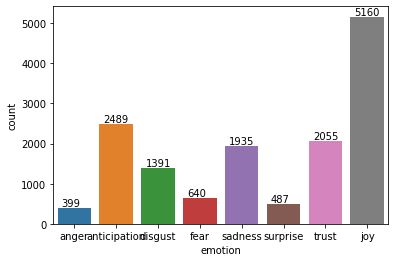

In [53]:
import seaborn as sns
ax = sns.countplot(df_val['emotion'], order=my_tags)

for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

### Save dataframe for later use

In [38]:
## save to pickle file
df_train.to_pickle("df_train.pkl")
df_val.to_pickle("df_val.pkl")
df_test.to_pickle("df_test.pkl")

### Loading saved dataframe

In [37]:
import pandas as pd

## load a pickle file
df_train = pd.read_pickle("df_train.pkl")
df_val = pd.read_pickle("df_val.pkl")
df_test = pd.read_pickle("df_test.pkl")

In [38]:
df_train

,hashtags,tweet_id,text,identification,emotion
794934,[],0x380be6,Today I got to know about one more fake baba ...,train,sadness
254162,[GamesOfThrones],0x28f153,GAME OF THRONES!!! 🐉 😵😮 #GamesOfThrones <LH>,train,joy
423917,[dream],0x235959,40 Never give up on your #dream. <LH> me to ma...,train,anticipation
783421,[],0x1da39e,@CNNPolitics He could just as well have been t...,train,sadness
1736577,"[gbbo, needaminiroll]",0x205458,I miss Selasi. Also why are there so many adve...,train,anticipation
...,...,...,...,...,...
288532,"[praia, cia]",0x2204f3,Beach ☀🏊😎😍 <LH> #praia <LH> #cia,train,joy
341013,[],0x1efe39,Inspire yourself before you inspire another. <...,train,joy
423159,"[TELLMEYOULOVEME, SORRYNOTSORRY, DADDYISSUES, ...",0x1f97a3,Seriously @ddlovato’s new album is pure 🔥🔥🔥 #T...,train,sadness
1146357,[],0x35036e,"When I wake up before my alarm, I don't allow ...",train,surprise


In [39]:
df_test

,hashtags,tweet_id,text,identification,emotion
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test,NaN
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test,NaN
9,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,test,NaN
30,"[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test,NaN
33,[],0x26289a,"In these tough times, who do YOU turn to as yo...",test,NaN
...,...,...,...,...,...
1867525,[],0x2913b4,"""For this is the message that ye heard from th...",test,NaN
1867529,[],0x2a980e,"""There is a lad here, which hath five barley l...",test,NaN
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...,test,NaN
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...,test,NaN


### class balancing by undersampling

In [7]:
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

In [8]:
X_res, y_res = rus.fit_resample(np.array(range(len(df_train))).reshape(-1,1), df_train['emotion'])

In [9]:
df_train_res = df_train.iloc[X_res.reshape(1, -1)[0]]

In [10]:
from collections import Counter

Counter(df_train_res['emotion'])

Counter({'anger': 39468,
         'anticipation': 39468,
         'disgust': 39468,
         'fear': 39468,
         'joy': 39468,
         'sadness': 39468,
         'surprise': 39468,
         'trust': 39468})

In [11]:
len(df_train_res)

315744

/home/allenyl/.py_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='emotion', ylabel='count'>

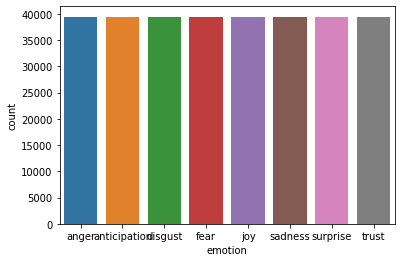

In [12]:
import seaborn as sns
sns.countplot(df_train_res['emotion'])

### extract top 10% emoji of each class

In [13]:
import emoji
emoji_list = dict()

for i,j in zip(df_train_res['text'], df_train_res['emotion']):
#     print(j)
    try:
        emoji_list[j] += emoji.distinct_emoji_list(i)
    except:
        emoji_list[j] = emoji.distinct_emoji_list(i)
    
#     emoji_list += emoji.distinct_emoji_list(i)
#     print(emoji.distinct_emoji_list(i))

In [14]:
emoji_list

{'anger': ['🤷🏻',
  '🤦\u200d♂️',
  '😡',
  '🙄',
  '🙄',
  '😳',
  '😤',
  '😬',
  '🙄',
  '💙',
  '😡',
  '😡',
  '😕',
  '🇬🇧',
  '🇪🇺',
  '🇷🇺',
  '🇨🇳',
  '🇺🇸',
  '🇨🇦',
  '🕘',
  '🇬🇧',
  '🇪🇺',
  '🇷🇺',
  '🇨🇳',
  '🇺🇸',
  '🇨🇦',
  '🕘',
  '🇬🇧',
  '🇪🇺',
  '🇷🇺',
  '🇨🇳',
  '🇺🇸',
  '🇨🇦',
  '🕘',
  '😒',
  '😶',
  '😡',
  '😤',
  '🙄',
  '🖕🏼',
  '😤',
  '🇬🇧',
  '🇪🇺',
  '🇷🇺',
  '🇨🇳',
  '🇺🇸',
  '🇨🇦',
  '🕘',
  '😡',
  '😡',
  '🇬🇧',
  '🇪🇺',
  '🇷🇺',
  '🇨🇳',
  '🇺🇸',
  '🇨🇦',
  '🕘',
  '😧',
  '😓',
  '😫',
  '😰',
  '😂',
  '😑',
  '😭',
  '🔶',
  '🔷',
  '🇮🇸',
  '✌️',
  '😴',
  '🙄',
  '🇬🇧',
  '🇪🇺',
  '🇷🇺',
  '🇨🇳',
  '🇺🇸',
  '🇨🇦',
  '🕘',
  '🙌',
  '😎',
  '😢',
  '😭',
  '📱',
  '\U0001f92c',
  '😒',
  '\U0001f92e',
  '😡',
  '🇬🇧',
  '🇪🇺',
  '🇷🇺',
  '🇨🇳',
  '🇺🇸',
  '🇨🇦',
  '🕘',
  '😡',
  '😡',
  '👎',
  '🙄',
  '\U0001f928',
  '🇬🇧',
  '🇪🇺',
  '🇷🇺',
  '🇨🇳',
  '🇺🇸',
  '🇨🇦',
  '🕘',
  '😡',
  '🤔',
  '🙄',
  '😠',
  '🙄',
  '💯',
  '😄',
  '😠',
  '😂',
  '🇬🇧',
  '🇪🇺',
  '🇷🇺',
  '🇨🇳',
  '🇺🇸',
  '🇨🇦',
  '🕘',
  '😒',
  '😑',
  '😤',
  '😕',
  '🤷🏽\u200d♂️',
  '😒',


In [16]:
emoji_count = dict()

for label in emoji_list.keys():
#     print(label, Counter(emoji_list[label]))
    emoji_count[label] = Counter(emoji_list[label])

# emoji_count = Counter(emoji_list)
emoji_count

{'anger': Counter({'🤷🏻': 1,
          '🤦\u200d♂️': 9,
          '😡': 1167,
          '🙄': 885,
          '😳': 62,
          '😤': 469,
          '😬': 70,
          '💙': 18,
          '😕': 95,
          '🇬🇧': 1578,
          '🇪🇺': 1571,
          '🇷🇺': 1575,
          '🇨🇳': 1575,
          '🇺🇸': 1608,
          '🇨🇦': 1579,
          '🕘': 1576,
          '😒': 562,
          '😶': 34,
          '🖕🏼': 17,
          '😧': 20,
          '😓': 43,
          '😫': 109,
          '😰': 20,
          '😂': 455,
          '😑': 229,
          '😭': 271,
          '🔶': 86,
          '🔷': 86,
          '🇮🇸': 1,
          '✌️': 9,
          '😴': 69,
          '🙌': 8,
          '😎': 53,
          '😢': 126,
          '📱': 5,
          '\U0001f92c': 79,
          '\U0001f92e': 7,
          '👎': 35,
          '\U0001f928': 9,
          '🤔': 164,
          '😠': 347,
          '💯': 57,
          '😄': 11,
          '🤷🏽\u200d♂️': 7,
          '🍔': 3,
          '🌭': 2,
          '👏🏽': 2,
          '🥇': 2,
          '

In [27]:
emoji_list_all = []

for key in emoji_count.keys():
    temp_list = emoji_count[key].most_common(int(len(emoji_count[key]) * 0.1))
    print(key, temp_list)
    print("")
    
    emoji_list_all += pd.DataFrame(temp_list)[0].tolist()

# pd.DataFrame(emoji_count)
emoji_list_all

anger [('🇺🇸', 1608), ('🇨🇦', 1579), ('🇬🇧', 1578), ('🕘', 1576), ('🇷🇺', 1575), ('🇨🇳', 1575), ('🇪🇺', 1571), ('😡', 1167), ('🙄', 885), ('😒', 562), ('😤', 469), ('😂', 455), ('😠', 347), ('😭', 271), ('😩', 261), ('😑', 229), ('🤔', 164), ('😔', 134), ('😢', 126), ('😷', 121), ('🔥', 118), ('🙃', 116), ('😫', 109), ('😐', 105), ('😣', 105), ('😕', 95), ('🤒', 90), ('🔶', 86), ('🔷', 86), ('\U0001f92c', 79), ('😞', 77), ('❤️', 74), ('😬', 70), ('🤢', 70), ('😴', 69), ('😳', 62), ('🤧', 61), ('🙈', 59), ('💯', 57), ('☹️', 57), ('😖', 56), ('🤣', 54), ('😍', 54), ('😎', 53), ('😪', 46), ('😱', 46), ('💔', 45), ('😥', 44), ('😓', 43), ('😊', 43), ('😏', 41), ('👿', 41), ('🤦🏽\u200d♀️', 38), ('👀', 37), ('😈', 37), ('👎', 35), ('😶', 34), ('😉', 33), ('❤', 33), ('👌', 33), ('💩', 32), ('💀', 32), ('😁', 31), ('🤦🏼\u200d♀️', 31), ('🖕', 31), ('😜', 30), ('🙁', 30), ('🤦🏻\u200d♀️', 29), ('🎶', 29), ('😘', 28), ('‼️', 27), ('😲', 27), ('👊', 26), ('🏈', 25), ('🙂', 24), ('🙏', 23), ('😀', 23), ('👍', 22), ('💥', 22)]

anticipation [('❤️', 434), ('😍', 397), ('🙏', 

['🇺🇸',
 '🇨🇦',
 '🇬🇧',
 '🕘',
 '🇷🇺',
 '🇨🇳',
 '🇪🇺',
 '😡',
 '🙄',
 '😒',
 '😤',
 '😂',
 '😠',
 '😭',
 '😩',
 '😑',
 '🤔',
 '😔',
 '😢',
 '😷',
 '🔥',
 '🙃',
 '😫',
 '😐',
 '😣',
 '😕',
 '🤒',
 '🔶',
 '🔷',
 '\U0001f92c',
 '😞',
 '❤️',
 '😬',
 '🤢',
 '😴',
 '😳',
 '🤧',
 '🙈',
 '💯',
 '☹️',
 '😖',
 '🤣',
 '😍',
 '😎',
 '😪',
 '😱',
 '💔',
 '😥',
 '😓',
 '😊',
 '😏',
 '👿',
 '🤦🏽\u200d♀️',
 '👀',
 '😈',
 '👎',
 '😶',
 '😉',
 '❤',
 '👌',
 '💩',
 '💀',
 '😁',
 '🤦🏼\u200d♀️',
 '🖕',
 '😜',
 '🙁',
 '🤦🏻\u200d♀️',
 '🎶',
 '😘',
 '‼️',
 '😲',
 '👊',
 '🏈',
 '🙂',
 '🙏',
 '😀',
 '👍',
 '💥',
 '❤️',
 '😍',
 '🙏',
 '😂',
 '🇺🇸',
 '😊',
 '😁',
 '❤',
 '💯',
 '🙌',
 '🔥',
 '🙏🏽',
 '🤔',
 '💕',
 '😘',
 '😎',
 '😭',
 '🎶',
 '😇',
 '🤗',
 '🎉',
 '👍',
 '😩',
 '💪',
 '🙏🏾',
 '💙',
 '😃',
 '🙏🏼',
 '😀',
 '✨',
 '😬',
 '🙏🏻',
 '😉',
 '✝️',
 '💖',
 '👌',
 '🎄',
 '😄',
 '☺️',
 '🙄',
 '🙈',
 '😜',
 '🌈',
 '😢',
 '🙌🏾',
 '🙌🏻',
 '💜',
 '👑',
 '👀',
 '😆',
 '💛',
 '💞',
 '😔',
 '😅',
 '✝',
 '🙌🏽',
 '😋',
 '⛪',
 '😱',
 '☀️',
 '💚',
 '🎤',
 '🙌🏼',
 '😳',
 '🤣',
 '⚽',
 '😌',
 '👏',
 '⚪',
 '😴',
 '💃',
 '💰',
 '💗',
 '🌎',
 '🎁',
 '🔴',
 '🥂',
 '💔',


In [70]:
df_emoji_count = pd.DataFrame(emoji_list_all).drop_duplicates().reset_index(drop=True)

In [71]:
df_emoji_count

,0
0,🇺🇸
1,🇨🇦
2,🇬🇧
3,🕘
4,🇷🇺
...,...
221,🍽
222,✅
223,🍂
224,👍🏼


### Save emoji list

In [78]:
df_emoji_count.to_pickle("df_emoji_count.pkl")

### Load emoji list

In [8]:
import pandas as pd
df_emoji_count = pd.read_pickle("df_emoji_count.pkl")

## Data Preprocessing

In [41]:
from datasets import Dataset, DatasetDict

train_ds = Dataset.from_pandas(df_train)
val_ds = Dataset.from_pandas(df_val)
test_ds = Dataset.from_pandas(df_test)

ds = DatasetDict()

ds['train'] = train_ds
ds['validation'] = val_ds
ds['test'] = test_ds

In [42]:
ds

DatasetDict({
    train: Dataset({
        features: ['hashtags', 'tweet_id', 'text', 'identification', 'emotion', '__index_level_0__'],
        num_rows: 1441007
    })
    validation: Dataset({
        features: ['hashtags', 'tweet_id', 'text', 'identification', 'emotion', '__index_level_0__'],
        num_rows: 14556
    })
    test: Dataset({
        features: ['hashtags', 'tweet_id', 'text', 'identification', 'emotion', '__index_level_0__'],
        num_rows: 411972
    })
})

In [43]:
from datasets import ClassLabel
my_tags = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']
ClassLabels = ClassLabel(num_classes=len(my_tags), names=my_tags)

ClassLabels

ClassLabel(num_classes=8, names=['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy'], id=None)

In [44]:
# Mapping Labels to IDs
def map_emotion2id(batch):
    batch['label'] = [ClassLabels.str2int(label) if label is not None else None for label in batch['emotion']]
    return batch

ds = ds.map(map_emotion2id, batched=True)
ds = ds.cast_column('label', ClassLabels)

Casting the dataset: 100%|██████████| 42/42 [00:01<00:00, 22.32ba/s]


In [45]:
# remove <LH> token
def remove_tokens(batch):
    batch['text'] = [text.replace("<LH>", "") for text in batch['text']]
    return batch

ds = ds.map(remove_tokens, batched=True)
# ds = ds.cast_column('label', ClassLabels)

100%|██████████| 412/412 [00:02<00:00, 181.13ba/s]


In [46]:
ds['train'].features

{'hashtags': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'tweet_id': Value(dtype='string', id=None),
 'text': Value(dtype='string', id=None),
 'identification': Value(dtype='string', id=None),
 'emotion': Value(dtype='string', id=None),
 '__index_level_0__': Value(dtype='int64', id=None),
 'label': ClassLabel(num_classes=8, names=['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy'], id=None)}

In [47]:
ds = ds.remove_columns(["hashtags", "identification", "emotion", "__index_level_0__"])

In [48]:
ds['train'].features

{'tweet_id': Value(dtype='string', id=None),
 'text': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=8, names=['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy'], id=None)}

In [49]:
ds

DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'text', 'label'],
        num_rows: 1441007
    })
    validation: Dataset({
        features: ['tweet_id', 'text', 'label'],
        num_rows: 14556
    })
    test: Dataset({
        features: ['tweet_id', 'text', 'label'],
        num_rows: 411972
    })
})

In [50]:
from itertools import islice

for text,label in islice(zip(ds['train']['text'], ds['train']['label']), 20):
    print(str(label) + '\t' + text)

4	Today I got to know about one more fake baba  And why the hell people killing and who r they killing in rage this time🤔 
7	GAME OF THRONES!!! 🐉 😵😮 #GamesOfThrones 
1	40 Never give up on your #dream.  me to make your dreams come   December 01, 2017 at 10:15AM
4	@CNNPolitics He could just as well have been talking about DJT !!#Sad
1	I miss Selasi. Also why are there so many adverts 😩 #gbbo  #needaminiroll
1	  Proverbs17:16It does a fool no good to spend money on an education, because he has no common sense.
1	#100DaysOfCode ended up with 40 M of news articles with categories . model training ...  to test out the accuracy #MachineLearning 😁
2	Ron Mott just said things in Puerto Rico aren’t that bad but then goes on a 5 minute list of complete misery.   #WTF? #MTP
4	RIP to the NFL.  #stupiddisrespectfulBS
5	It is really  how changing just a single thing or thought process in your #life can #produce immediate returns
1	Hey #Texas  doesn't exist! Mother Nature says fuck you! #HurricaneHarv

### Tokenize

In [52]:
from transformers import AutoTokenizer

# model_name = "bert-base-uncased"
model_name = "bhadresh-savani/bert-base-uncased-emotion"
tokenizer = AutoTokenizer.from_pretrained(model_name)

num_added_toks = tokenizer.add_tokens(df_emoji_count[0].tolist())

print('We have added', num_added_toks, 'tokens')

def tokenize(batch):
    return tokenizer(batch["text"], truncation=True, max_length=300)

def tokenize2(batch):
    return tokenizer(batch["text"], truncation=True, max_length=512)

loading configuration file https://huggingface.co/bhadresh-savani/bert-base-uncased-emotion/resolve/main/config.json from cache at /home/allenyl/.cache/huggingface/transformers/382cb084b1dd3103c0226d2db19441582a5e769cb80e4d2a799b2e494a4b6095.8b8666fb5e39e668fedb40037100ed06814f2bd32dbaa60ce05f0ad74bd24f6a
Model config BertConfig {
  "_name_or_path": "bhadresh-savani/bert-base-uncased-emotion",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "sadness",
    "1": "joy",
    "2": "love",
    "3": "anger",
    "4": "fear",
    "5": "surprise"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 3,
    "fear": 4,
    "joy": 1,
    "love": 2,
    "sadness": 0,
    "surprise": 5
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 5

We have added 225 tokens


In [53]:
from datasets import Dataset, DatasetDict
ds_encoded = DatasetDict()

In [54]:
ds_encoded['train'] = ds['train'].map(tokenize2, batched=True, batch_size=1000)
ds_encoded['validation'] = ds['validation'].map(tokenize2, batched=True, batch_size=1000)
ds_encoded['test'] = ds['test'].map(tokenize2, batched=True, batch_size=1000)

# ds_encoded = ds.map(tokenize, batched=True, batch_size=1000)

100%|██████████| 412/412 [00:08<00:00, 49.61ba/s]


In [55]:
ds_encoded["train"].features

{'tweet_id': Value(dtype='string', id=None),
 'text': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=8, names=['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy'], id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

In [56]:
ds_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
ds_encoded["train"].features

{'tweet_id': Value(dtype='string', id=None),
 'text': Value(dtype='string', id=None),
 'label': ClassLabel(num_classes=8, names=['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy'], id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

#### show label, length and decoded text

In [57]:
from itertools import islice

for input_ids,label in islice(zip(ds_encoded['train']['input_ids'], ds_encoded['train']['label']), 20):
    print(str(label), len(input_ids), tokenizer.decode(input_ids) )

tensor(4) 28 [CLS] today i got to know about one more fake baba and why the hell people killing and who r they killing in rage this time 🤔 [SEP]
tensor(7) 17 [CLS] game of thrones!!! [UNK] 😵 😮 # gamesofthrones [SEP]
tensor(1) 26 [CLS] 40 never give up on your # dream. me to make your dreams come december 01, 2017 at 10 : 15am [SEP]
tensor(4) 22 [CLS] @ cnnpolitics he could just as well have been talking about djt!! # sad [SEP]
tensor(1) 26 [CLS] i miss selasi. also why are there so many adverts 😩 # gbbo # needaminiroll [SEP]
tensor(1) 28 [CLS] proverbs17 : 16it does a fool no good to spend money on an education, because he has no common sense. [SEP]
tensor(1) 35 [CLS] # 100daysofcode ended up with 40 m of news articles with categories. model training... to test out the accuracy # machinelearning 😁 [SEP]
tensor(2) 35 [CLS] ron mott just said things in puerto rico aren ’ t that bad but then goes on a 5 minute list of complete misery. # wtf? # mtp [SEP]
tensor(4) 15 [CLS] rip to the nfl. 

### Save processed dataset

In [58]:
ds_encoded.save_to_disk("ds_encoded.hf")

### Loading processed dataset

In [9]:
from datasets import ClassLabel
my_tags = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']
ClassLabels = ClassLabel(num_classes=len(my_tags), names=my_tags)

ClassLabels

ClassLabel(num_classes=8, names=['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy'], id=None)

In [10]:
from datasets import load_from_disk
  
ds_encoded = load_from_disk("./ds_encoded.hf")

In [11]:
ds_encoded

DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1441007
    })
    validation: Dataset({
        features: ['tweet_id', 'text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 14556
    })
    test: Dataset({
        features: ['tweet_id', 'text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 411972
    })
})

### remove unnecssary columns

In [12]:
ds_encoded['train'] = ds_encoded['train'].remove_columns(["tweet_id"])
ds_encoded['validation'] = ds_encoded['validation'].remove_columns(["tweet_id"])

In [13]:
ds_encoded["test"] = ds_encoded["test"].remove_columns(["label"])

## Model Training

In [7]:
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [8]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device('cuda:1')

In [9]:
device

device(type='cuda')

In [14]:
from transformers import AutoTokenizer

# model_name = "bert-base-uncased"
model_name = "bhadresh-savani/bert-base-uncased-emotion"
tokenizer = AutoTokenizer.from_pretrained(model_name)

num_added_toks = tokenizer.add_tokens(df_emoji_count[0].tolist())

print('We have added', num_added_toks, 'tokens')

We have added 225 tokens


#### show label, length and decoded text

In [15]:
from itertools import islice

for input_ids,label in islice(zip(ds_encoded['train']['input_ids'], ds_encoded['train']['label']), 20):
    print(str(label), len(input_ids), tokenizer.decode(input_ids) )

4 28 [CLS] today i got to know about one more fake baba and why the hell people killing and who r they killing in rage this time 🤔 [SEP]
7 17 [CLS] game of thrones!!! [UNK] 😵 😮 # gamesofthrones [SEP]
1 26 [CLS] 40 never give up on your # dream. me to make your dreams come december 01, 2017 at 10 : 15am [SEP]
4 22 [CLS] @ cnnpolitics he could just as well have been talking about djt!! # sad [SEP]
1 26 [CLS] i miss selasi. also why are there so many adverts 😩 # gbbo # needaminiroll [SEP]
1 28 [CLS] proverbs17 : 16it does a fool no good to spend money on an education, because he has no common sense. [SEP]
1 35 [CLS] # 100daysofcode ended up with 40 m of news articles with categories. model training... to test out the accuracy # machinelearning 😁 [SEP]
2 35 [CLS] ron mott just said things in puerto rico aren ’ t that bad but then goes on a 5 minute list of complete misery. # wtf? # mtp [SEP]
4 15 [CLS] rip to the nfl. # stupiddisrespectfulbs [SEP]
5 23 [CLS] it is really how changing just 

In [12]:
from transformers import AutoModelForSequenceClassification
num_labels = len(my_tags)
model = (AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels, ignore_mismatched_sizes=True).to(device))

model.resize_token_embeddings(len(tokenizer))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bhadresh-savani/bert-base-uncased-emotion and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([6, 768]) in the checkpoint and torch.Size([8, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([6]) in the checkpoint and torch.Size([8]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Embedding(30747, 768)

In [13]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [14]:
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding

batch_size = 64
logging_steps = len(ds_encoded["train"]) // batch_size
training_args = TrainingArguments(output_dir="results",
                                  num_train_epochs=8,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  load_best_model_at_end=True,
                                  metric_for_best_model="f1",
                                  weight_decay=0.01,
                                  evaluation_strategy="steps",
                                  save_strategy="steps",
                                  eval_steps=1000,
                                  save_steps=3000,
                                  save_total_limit = 5,
                                  group_by_length=True,
                                  gradient_accumulation_steps=1,
                                  disable_tqdm=False)

In [ ]:
from transformers import Trainer

data_collocator = DataCollatorWithPadding(tokenizer)

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  data_collator=data_collocator,
                  train_dataset=ds_encoded["train"],
                  eval_dataset=ds_encoded["validation"])
trainer.train()

The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/home/allenyl/.py_env/lib/python3.6/site-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 1441007
  Num Epochs = 8
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 180128


Step,Training Loss,Validation Loss,Accuracy,F1
1000,1.278500,1.201040,0.569937,0.549979
2000,1.178700,1.136544,0.591646,0.573470
3000,1.131700,1.100388,0.605317,0.593628
4000,1.121700,1.083056,0.607035,0.593910
5000,1.102200,1.061997,0.620844,0.607199
6000,1.076100,1.050162,0.619882,0.607981
7000,1.066800,1.039706,0.622630,0.615957
8000,1.067000,1.032158,0.629775,0.613685
9000,1.051300,1.018030,0.632248,0.617946
10000,1.043100,1.023269,0.631904,0.626798


The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
Saving 

***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
Saving model checkpoint to results/checkpoint-21000
Configuration saved in results/checkpoint-21000/config.json
Model weights saved in results/checkpoint-21000/pytorch_model.bin
Deleting older checkpoint [results/checkpoint-6000] due to args.save_total_limit
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
The fol

***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
Saving model checkpoint to results/checkpoint-42000
Configuration saved in results/checkpoint-42000/config.json
Model weights saved in results/checkpoint-42000/pytorch_model.bin
Deleting older checkpoint [results/checkpoint-27000] due to args.save_total_limit
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
The fo

***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
The following columns in the evaluation set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 14556
  Batch size = 64
Saving model checkpoint to results/checkpoint-63000
Configuration saved in results/checkpoint-63000/config.json
Model weights saved in results/checkpoint-63000/pytorch_model.bin
Deleting older checkpoint [results/checkpoint-48000] due to args.save_total_limit
The fo

In [36]:
# trainer.train()

### Save trained model

In [ ]:
model.save_pretrained('./model')
tokenizer.save_pretrained('./model')

### Free GPU memory

In [15]:
del model
del tokenizer

In [16]:
torch.cuda.empty_cache()

In [17]:
torch.cuda.memory_allocated()

0

### Loading Saved model

In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/home/allenyl/.py_env/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
device

device(type='cuda')

In [31]:
from transformers import AutoModelForSequenceClassification
# num_labels = len(my_tags)
# model_path = './model'
# model_path = "./results/checkpoint-60000"
model_path = "./results/checkpoint-180000"
model = (AutoModelForSequenceClassification.from_pretrained(model_path).to(device))

loading configuration file ./results/checkpoint-180000/config.json
Model config BertConfig {
  "_name_or_path": "./results/checkpoint-180000",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "LABEL_7": 7
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem

In [6]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(model_path)

OSError: Can't load tokenizer for './results/checkpoint-60000'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure './results/checkpoint-60000' is the correct path to a directory containing all relevant files for a BertTokenizerFast tokenizer.

In [32]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [33]:
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding

batch_size = 64
logging_steps = len(ds_encoded["train"]) // batch_size
training_args = TrainingArguments(output_dir="results",
                                  num_train_epochs=8,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  load_best_model_at_end=True,
                                  metric_for_best_model="f1",
                                  weight_decay=0.01,
                                  evaluation_strategy="steps",
                                  save_strategy="steps",
                                  eval_steps=1000,
                                  save_steps=3000,
                                  save_total_limit = 5,
                                  group_by_length=True,
                                  disable_tqdm=False)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [34]:
from transformers import Trainer

data_collocator = DataCollatorWithPadding(tokenizer)

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  data_collator=data_collocator,
                  train_dataset=ds_encoded["train"],
                  eval_dataset=ds_encoded["validation"])

## Evaluation

In [35]:
preds_output = trainer.predict(ds_encoded["validation"])
preds_output.metrics

The following columns in the test set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 14556
  Batch size = 64


{'test_loss': 1.2619826793670654,
 'test_accuracy': 0.6562929376202253,
 'test_f1': 0.6539732281758613,
 'test_runtime': 16.1057,
 'test_samples_per_second': 903.78,
 'test_steps_per_second': 14.156}

In [36]:
import numpy as np
from sklearn.metrics import plot_confusion_matrix
y_valid = np.array(ds_encoded["validation"]["label"])
y_preds = np.argmax(preds_output.predictions, axis=1)

[Text(0.5, 15.0, 'Predict'), Text(33.0, 0.5, 'Ground Truth')]

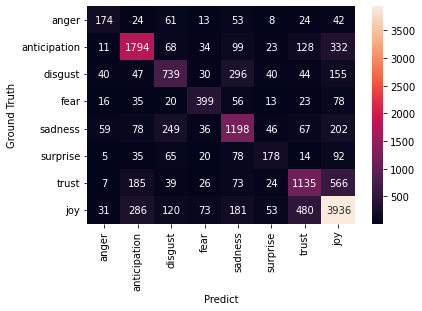

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, y_preds)
f = sns.heatmap(cm, annot=True, fmt='d', xticklabels=my_tags, yticklabels=my_tags)

# ax = sns.heatmap(glue, annot=True)
f.set(xlabel="Predict", ylabel="Ground Truth")

### Print miss classified cases

In [51]:
wrong_predict_index = (y_valid != y_preds)

y_valid[wrong_predict_index]

array([6, 6, 2, ..., 2, 6, 2])

In [52]:
len(y_valid[wrong_predict_index])

5003

In [125]:
# ds_encoded["validation"]['text']

In [115]:
def print_label_text(y_valids, y_predss, texts):
    for truth, predict, text in zip(
        y_valids, 
        y_predss, 
        texts):

    #     print(ClassLabels.int2str(truth), ClassLabels.int2str(predict), text)
    #     print("debug")
        if len(ClassLabels.int2str(int(truth))) >= 8:
            if len(ClassLabels.int2str(int(predict))) >= 8:
                print(ClassLabels.int2str(int(truth)) + "\t" + ClassLabels.int2str(int(predict)) + "\t" + text)
            else:
                print(ClassLabels.int2str(int(truth)) + "\t" + ClassLabels.int2str(int(predict)) + "\t\t" + text)
        else:
    #         print(ClassLabels.int2str(int(truth)) + "\t" + ClassLabels.int2str(int(predict)) + "\t" + text)
            if len(ClassLabels.int2str(int(predict))) >= 8:
                print(ClassLabels.int2str(int(truth)) + "\t\t" + ClassLabels.int2str(int(predict)) + "\t" + text)
            else:
                print(ClassLabels.int2str(int(truth)) + "\t\t" + ClassLabels.int2str(int(predict)) + "\t\t" + text)
        print("----------")

In [118]:
# miss classified cases
print_label_text(y_valid[wrong_predict_index], 
                 y_preds[wrong_predict_index], 
                 np.array(ds_encoded["validation"]['text'])[wrong_predict_index])

trust		joy		Listening to @xtina just makes me want to pack up, move to NYC, and follow my dreams.   🎶😍🌃
----------
trust		joy		@elonmusk #powerwall in PR with solar tiles decentralize the grid. #Tesla Bringing  to our brothers and #relief #humanitarian
----------
disgust		anticipation	I no fit imagine my own #Nigga,  Way pick money for ground,  See me dey run....  
----------
disgust		joy		@Bravotv #Shahs @GolnesaGG I❤U mamas but follow suit girl💯Ur in a diff country acting like u cant be touched  @mikeshouhed is on point👏
----------
joy		sadness		Burying my son today. Will you keep him in your prayers and thoughts? #heroin #overdose #addiction 
----------
trust		joy		We 👼 woke up to see another day 
----------
surprise	disgust		CADR hooked to a Wishbone bus?  #lisp #machine #hacking
----------
disgust		sadness		@EAHelp thanks for extending the beta for 2 days. Then seemingly disabling controller input so an unplayable 13 gig advertisement. 
----------
joy		anger		Crazy what a three ho

joy		anticipation	Thank you for all the blessings. #churchtime  #SundayMorning
----------
disgust		joy		Fuck, Marry had a little lamb, but yet I'm trailer trash?  she didn't have to bring the lamb to school one day...
----------
joy		disgust		Waking up in a dream 
----------
joy		trust		God showed Moses a glimpse of his back,he managed to write the whole book of Genesis   #Godsglory #mightyGod
----------
joy		sadness		@FreelandJared Damn. Too bad I’m right next to you in our room while your trying to sing logic , 
----------
joy		anticipation	Never ever been so proud of myself ! I fuckin did it 🙌🏻🙌🏻🙌🏻🙏🏼🙏🏼🙏🏼🙏🏼  #Guided #Hardwork #FuckPeopleWhoDoubted 😏
----------
disgust		joy		Cops racial profiling and accused #whitehead and #cowboys drop him for it ,  #nfl can't wait to see you guys lose all your games
----------
sadness		joy		My lil 👸🏽 say money change me but in reality she just don’t like me getting it.  😴 .. she won’t leave though 🤣
----------
trust		joy		@Rosscocuth Save you a fort

anticipation	joy		When you close your eyes for a 20 minute power nap & wake up over 3 hours later...slight waste of an afternoon off but oh well🙈😴 
----------
trust		joy		7 hour stream, lots of laughs and fun times with the community! thanks everyone! #TeamEmmmmsie #community  #SupportSmallStreamers
----------
trust		joy		Entertainers take what the average person sees as normal & makes you see it as a vision.  #life #skills
----------
sadness		joy		I kid you not half my coworkers snapchat me before 9am and it’s like yeah no  forever lol
----------
joy		anticipation	No matter how hard they hate, we must  even harder ☮️
----------
sadness		fear		Fellas, if you aren't spooning your kaplan Quicksheets then you're doing it wrong smh!!!  😩😩😩😩😩
----------
sadness		disgust		legalize guns in a country with so much diversity in mentality then shit like this happens. The cons just far outweigh the pros 
----------
surprise	joy		I can't even hear our stage today I feel so 
----------
trust		joy		A

joy		trust		already gained the “freshman 15” and I haven't even started freshman year (':    
----------
joy		trust		 #offer for small companies for #pentesting & #VulnerabilityAssessment #security #services, contact us at info@technologieshive.com
----------
anticipation	joy		#IdolsSA   has just taken my spirit to another level not everybody can do, From here on my #Votes  definitely are with her 🙌🙌🙌🙋
----------
joy		disgust		I hate the use of  #ConfessYourUnpopularOpinion
----------
anticipation	joy		I wonder how good a @McDonalds burger cooked on a @BurgerKing flame broiler would taste?🤔  Things thought of while stuck in #traffic 
----------
disgust		sadness		Why didn’t I take today off like every other teacher at my shop 
----------
trust		joy		Crazy.. just terrifying, prayers to everyone in Las Vegas tonight. blessed to be safe and surrounded by friends tonight #mandalaybay 
----------
disgust		fear		Your insecurities are showing @juliettep0rter 😝 
----------
sadness		disgust		@Pa

In [124]:
# right classified cases
print_label_text(y_valid[~wrong_predict_index], 
                 y_preds[~wrong_predict_index], 
                 np.array(ds_encoded["validation"]['text'])[~wrong_predict_index])

sadness		sadness		@POWERATL @iHeartRadio @OnAirWithRyan Please make my day and play  by @FifthHarmony !
----------
joy		joy		Closed Buy 2.1 Lots EURUSD 1.18265 for +13.4 pips, total for today +646.7 pips     
----------
trust		trust		#-#G-#Black-#amp-#Clear-#Nice-#Creative-#Design-Chrome-iPhone-7-6-S-Plus-5-SE-case-/152641535829
----------
joy		joy		Thank you @mischiefcomedy i am now 3 out 3 - @BankRobberyPlay was 
----------
trust		trust		@palakmuchhal3 That's true that's why I said  of India!! I wish this shine is for forever! 😁😁
----------
anticipation	anticipation	Hey @zlatford.  bless you
----------
anticipation	anticipation	May the Lord direct your hearts towards #God's love and the steadfastness of Christ. 2 Thess. 3:5
----------
joy		joy		I j wrote 2 full pages of things that make me happy. I can’t remember the last time I was this genuinely happy! :)) 
----------
joy		joy		We Are #HeadStrong #Bassline #Artcore #Bounce #Breaks #Chemical #ChicagoHouse  Out #Disco #Dancehall #Dee

joy		joy		We deserve  no matter our size or what our bodies look like, period! #HAES #HealthAtEverySize  #Dietitian #bodypositive #RD2B
----------
trust		trust		@mrchisom great talk "Don't play small" "Power Posing" Thank you for the talk! #usbank #brandofstl #empower 
----------
joy		joy		#HappySunday! Nothing is more rewarding that lifting someone higher. Speak life into others. 💗 #blessings  #compliment #empowerment
----------
joy		joy		Gold cannot be #pure, and people cannot be #perfect. #proverb #peopleskills #tattvacommunication
----------
trust		trust		Thank you, God, for the gift of music.  
----------
joy		joy		@samkeeling @LukeGoss @mattgoss It truly is 😊  Hope you're well lovely lady 💖
----------
fear		fear		@lookatthatcass @brookedeeann have fun!!!!!!#jealous
----------
anticipation	anticipation	@TheMikeSalk If I knew how ta "LIKE" a n#gga cannabis city snoop shake I would.#Jesus Lub All Jahspreadation (yeah dats a word)
----------
trust		trust		@Kimberley_S_J Fabulous to s

sadness		sadness		Just realized today was my last day to lay in bed til almost-noon  #butitsokay #becauseschoolmeansfriends
----------
trust		trust		Whom do u  few #Whites with #Hidden agenda or ur own blood..
----------
anticipation	anticipation	@bestbuy picking up #Bethesda #Wolfenstein2  #killcommies #killnazis
----------
disgust		disgust		@globeandmail @GlobeDebate Neither. 
----------
sadness		sadness		@evilolive73 Yes that is all you took in during school -  
----------
sadness		sadness		No new @NBCChicagoPD tonight??? 
----------
joy		joy		Excited to announce I have joined @HockeyExtraNHL as a Leafs/Hockey writer. Looking forward to sharing good  with you all!
----------
joy		joy		With new scientific methods taught at The Beauty Institute, this goal can be easier to accomplish.  #school #education
----------
trust		trust		I'm  for new ideas and people who inspire me to grow. @LiamABlack @MCSnugz @JohnCMaxwell @simonsinek @RASumner @eleanorbeaton ↗
----------
joy		joy		 coffee   

anticipation	anticipation	I want to see how Katty is going to host after the performance, the look on her face   #DailyPop
----------
sadness		sadness		@realDonaldTrump @RealEagleBites is one of the Trump admin fake twitter accounts. 
----------
anticipation	anticipation	Jn.20:19  "PEACE BE WITH YOU."  
----------
joy		joy		@ShawnMendes rocked my world for the second time!!! Sooooooo AMAZING!! #IlluminateTourDenver    😻❤️
----------
joy		joy		@omgchomp @nikkiblackcat This is the  I'm thankful for. 😍😍😍😍
----------
joy		joy		@TheBonnieKiwi @SynchoHR @WomblesGaming @StealelvesGame HASHTAGS FOR DAYS!!!!!   ....I’m bored now..... 😂😂😂
----------
trust		trust		Hey DJNico Barreiro thanks for the follow!! Here to #help your    endeavors. How’s Ur Day?
----------
disgust		disgust		They missed a holding call.  #2-1
----------
joy		joy		Closed Sell 1.4 Lots EURUSD 1.18543 for +10.6 pips, total for today +51.0 pips     
----------
joy		joy		The ones I showed the most  to showed me the most #pain
--

----------
trust		trust		@PaulFGilroy Well done boys 
----------
joy		joy		But I'm  and #stronger
----------
disgust		disgust		#GorakhpurCoverup It is a very sad moment That's make me angry enough 56 child were die in the lack of treatment and oxygen 
----------
trust		trust		Hey Listas New Garamond thanks for the follow!! Here to #help your    endeavors. How’s Ur Day?
----------
anticipation	anticipation	1 Timothy 1:7. There is a lot of false teaching going around. Read and study your bible. See what God says and rely on that.   
----------
anticipation	anticipation	48 hour shift and then 2 weeks away, I can do this 🙏🏻  #rest
----------
trust		trust		@SuzanneFalter Hi.@mdgblogger Thank you for your follow Have a  sunshine filled day!
----------
joy		joy		Thank you God for waking me up this morning #blessed🙏➕💯
----------
joy		joy		@LanaDavies1 Omg that was when my vein exploded so lucky to be alive celebrating today  🙌🏼👏🏼
----------
sadness		sadness		Hey @OnAirRomeo please play  by @Fi

----------
anticipation	anticipation	@CFCPinky Not long now Nanna! 😁  mucho
----------
joy		joy		Life is so good. 
----------
anticipation	anticipation	The #LAW #DEMANDS righteousness.  #GIVES @righteousness. You must #choose: slavery or #sonship. #ItIsFinished  #ItIsDone #Choice
----------
joy		joy		I met a wiener dog today and his name was Frankie. 
----------
trust		trust		There are people who see #Intolerance should see the hashra #RainHosts from Mumbaikars.  #UnitedIndia #MumbaiRains
----------
disgust		disgust		When girls call their boyfriends or husbands "Daddy"  😷😷😷😷!! I wish I would call my boyfriend "Daddy" 😂😂😂 #FuckOuttaHere #NoSir
----------
anger		anger		Only Wednesday and I need a drink #isitfridayyet #pleasehurry  #needadrink
----------
joy		joy		 #hair. Happy #life.
----------
sadness		sadness		@P5HBrazil @H4rmonyNewsBr @FifthHarmony vote for @FifthHarmony  for Song Of The Summer  7
----------
joy		joy		@theodd1sout Thankful 
----------
anticipation	anticipation	Wiesbad

## Export predicted emotion on test set

In [38]:
ds_encoded["test"]

Dataset({
    features: ['tweet_id', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 411972
})

In [39]:
test_preds_output = trainer.predict(ds_encoded["test"])

The following columns in the test set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: tweet_id, text. If tweet_id, text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 411972
  Batch size = 64


In [40]:
test_preds_output.predictions

array([[-2.0559385 , 10.172999  , -2.9733007 , ..., -2.344928  ,
        -0.10528718,  0.32579535],
       [-4.5345073 ,  3.803746  , -3.4165857 , ..., -2.0770214 ,
         6.9439216 ,  1.5460863 ],
       [-3.2303903 ,  2.0073783 , -2.599245  , ..., -1.6751404 ,
         1.2155664 ,  8.013651  ],
       ...,
       [-2.2792532 ,  1.7332679 , -1.7607768 , ..., -2.183783  ,
         0.6186412 , -1.0421319 ],
       [-2.7374794 ,  3.270595  , -3.479159  , ..., -2.3274133 ,
         4.4179106 ,  4.48663   ],
       [ 4.263337  ,  0.12677903,  0.43208092, ..., -0.70536417,
        -1.2707542 , -2.9500186 ]], dtype=float32)

In [126]:
test_preds_output.predictions[0]

array([-2.0559385 , 10.172999  , -2.9733007 , -1.891738  , -0.6474481 ,
       -2.344928  , -0.10528718,  0.32579535], dtype=float32)

In [41]:
import numpy as np

test_pred = np.argmax(test_preds_output.predictions, axis=1).tolist()

In [42]:
test_pred_str = [ClassLabels.int2str(label) for label in test_pred]

In [43]:
df_test = ds_encoded["test"].to_pandas()

In [44]:
df_test['emotion_pred'] = test_pred_str

In [45]:
df_test

,tweet_id,text,input_ids,token_type_ids,attention_mask,emotion_pred
0,0x28b412,"Confident of your obedience, I write to you, k...","[101, 9657, 1997, 2115, 22645, 1010, 1045, 433...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",anticipation
1,0x2de201,"""Trust is not the same as faith. A friend is s...","[101, 1000, 3404, 2003, 2025, 1996, 2168, 2004...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",trust
2,0x218443,When do you have enough ? When are you satisfi...,"[101, 2043, 2079, 2017, 2031, 2438, 1029, 2043...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",joy
3,0x2939d5,"God woke you up, now chase the day #GodsPlan #...","[101, 2643, 8271, 2017, 2039, 1010, 2085, 5252...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",anticipation
4,0x26289a,"In these tough times, who do YOU turn to as yo...","[101, 1999, 2122, 7823, 2335, 1010, 2040, 2079...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",anticipation
...,...,...,...,...,...,...
411967,0x2913b4,"""For this is the message that ye heard from th...","[101, 1000, 2005, 2023, 2003, 1996, 4471, 2008...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",anticipation
411968,0x2a980e,"""There is a lad here, which hath five barley l...","[101, 1000, 2045, 2003, 1037, 14804, 2182, 101...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",anticipation
411969,0x316b80,When you buy the last 2 tickets remaining for ...,"[101, 2043, 2017, 4965, 1996, 2197, 1016, 9735...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",fear
411970,0x29d0cb,I swear all this hard work gone pay off one da...,"[101, 1045, 8415, 2035, 2023, 2524, 2147, 2908...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",joy


In [46]:
df_test[['tweet_id', 'emotion_pred']].to_csv('prediction2.csv', index=False, header=['id', 'emotion'])